In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from datetime import datetime
from datetime import timedelta
import requests

In [74]:
df = pd.DataFrame.from_csv('Bluetooth_Travel_Sensors_-_Individual_Address_Files__IAF_.csv')

In [75]:
riverside_df = df[df.reader_identifier.str.contains(r'ih_35_riverside')]
cesar_chavez_df = df[df.reader_identifier.str.contains(r'cesar_chavez_ih_35')]

In [76]:
bridge = riverside_df.merge(cesar_chavez_df, how='inner', on='device_address')

In [77]:
fmt = '%m/%d/%Y %I:%M:%S %p'
bridge['host_read_time_x'] = pd.to_datetime(bridge['host_read_time_x'], format = fmt)
bridge['host_read_time_y'] = pd.to_datetime(bridge['host_read_time_y'], format = fmt)
bridge['field_device_read_time_x'] = pd.to_datetime(bridge['field_device_read_time_x'], format=fmt)
bridge['field_device_read_time_y'] = pd.to_datetime(bridge['field_device_read_time_y'], format=fmt)

In [78]:
bridge_filtered = pd.DataFrame()
devices = set(bridge['device_address'])
for device in devices:
    device_records = bridge[bridge['device_address'] == device]
    read_times_x = set(device_records['host_read_time_x'])
    for read_time in read_times_x:
        time_x_records = device_records[device_records['host_read_time_x'] == read_time]
        time_diffs = np.abs(time_x_records['host_read_time_x'] - time_x_records['host_read_time_y'])
        bridge_filtered = bridge_filtered.append(bridge.iloc[time_diffs.argmin()])

In [79]:
bridge = bridge_filtered

In [80]:
northbound = bridge[bridge['host_read_time_x'] < bridge['host_read_time_y']]
southbound = bridge[bridge['host_read_time_y'] < bridge['host_read_time_x']]

In [81]:
time_north = northbound['host_read_time_y'] - northbound['host_read_time_x']
time_south = southbound['host_read_time_x'] - southbound['host_read_time_y']

In [72]:
sorted(time_north)

[Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:01'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:02'),
 Timedelta('0 days 00:00:03'),
 Timedelta('0 days 00:00:04'),
 Timedelta('0 days 00:00:04'),
 Timedelta('0 days 00:00:04'),
 Timedelta('0 days 00:00:04'),
 Timedelta('0 days 00:00:06'),
 Timedelta('0 days 00:00:08'),
 Timedelta('0 days 00:00:09'),
 Timedelta('0 days 00:00:09'),
 Timedelta('0 days 00:00:10'),
 Timedelta('0 days 00:00:15'),
 Timedelta('0 days 00:00:16'),
 Timedelta('0 days 00:00:17'),
 Timedelta('0 days 00:00:17'),
 Timedelta('0 days 00:00:19'),
 Timedelta('0 days 00:00:19'),
 Timedelta('0 days 00:00:21'),
 Timedelta('0 days 00:00:21'),
 Timedelta('0 days 00:00:22'),
 Timedelta('0 days 00:00:23'),
 Timedelta('0 days 00:00:24'),
 Timedelta('0 days 00:00:26'),
 Timedelta('0 days 00:00:27'),
 Timedelta('0 days 00:00:27'),
 Timedelta('0 days 00:00:29'),
 Timedel

In [82]:
northbound = northbound.assign(time_north=time_north)
southbound = southbound.assign(time_south=time_south)

#northbound['time_north'] = time_north
#southbound['time_south'] = time_south

In [83]:
print(len(northbound))
print(len(southbound))

2169
676


In [84]:
northbound['time_north']

30370   00:02:26
9535    00:03:11
9758    00:02:08
30467   00:03:02
9370    00:24:08
29881   00:01:37
30254   00:02:06
31060   00:01:28
31150   00:03:20
9094    00:06:35
9088    00:01:17
10160   00:02:08
10103   00:02:35
30727   00:01:31
9542    00:02:53
8821    00:03:12
8829    01:52:30
8862    00:01:00
8814    00:47:49
8845    00:02:04
8836    01:36:33
31141   00:02:12
30899   00:01:26
9211    03:40:23
30686   01:08:40
30707   00:43:35
30692   01:01:12
30700   00:52:14
30705   00:45:53
30695   00:58:04
          ...   
10310   00:01:10
9851    00:01:55
10409   00:19:41
10414   00:01:10
10411   00:18:39
10407   01:02:24
30081   00:02:38
10359   00:01:16
30831   00:01:53
8920    01:32:22
8921    00:02:20
30659   00:01:40
29254   00:06:30
10259   00:02:48
30920   00:01:47
9473    00:02:46
8992    00:01:15
30503   00:03:09
9958    01:31:32
9959    00:03:05
31191   00:02:39
9358    00:02:01
9571    00:01:40
9630    00:02:42
30665   00:02:11
30826   00:01:48
31062   00:01:58
31108   00:02:

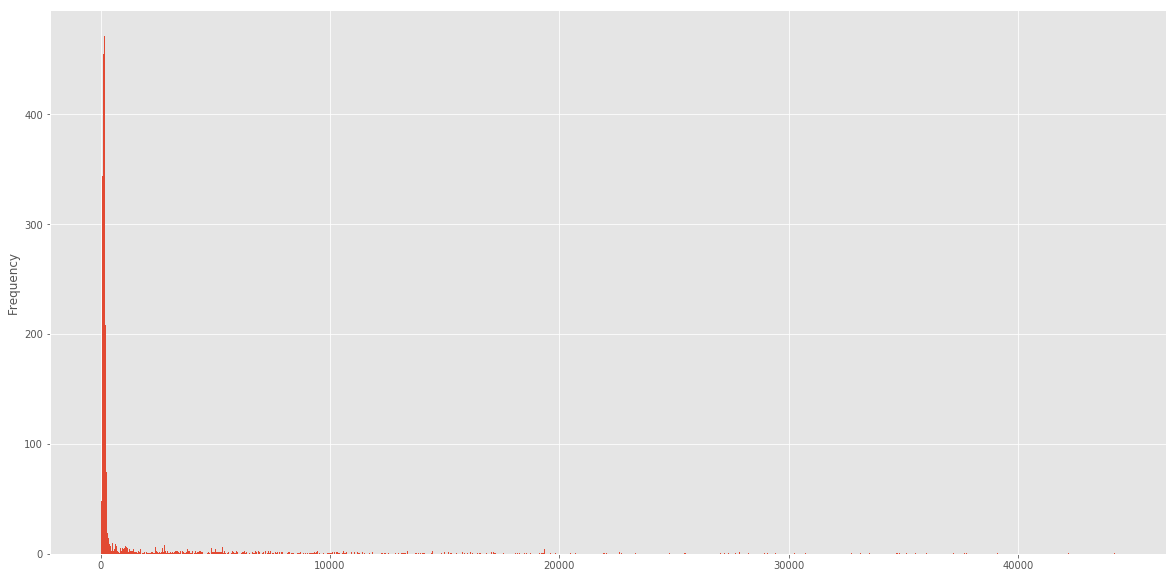

In [85]:
plt.figure(figsize=(20,10))
northbound['time_north'].astype('timedelta64[s]').plot.hist(bins=1000)

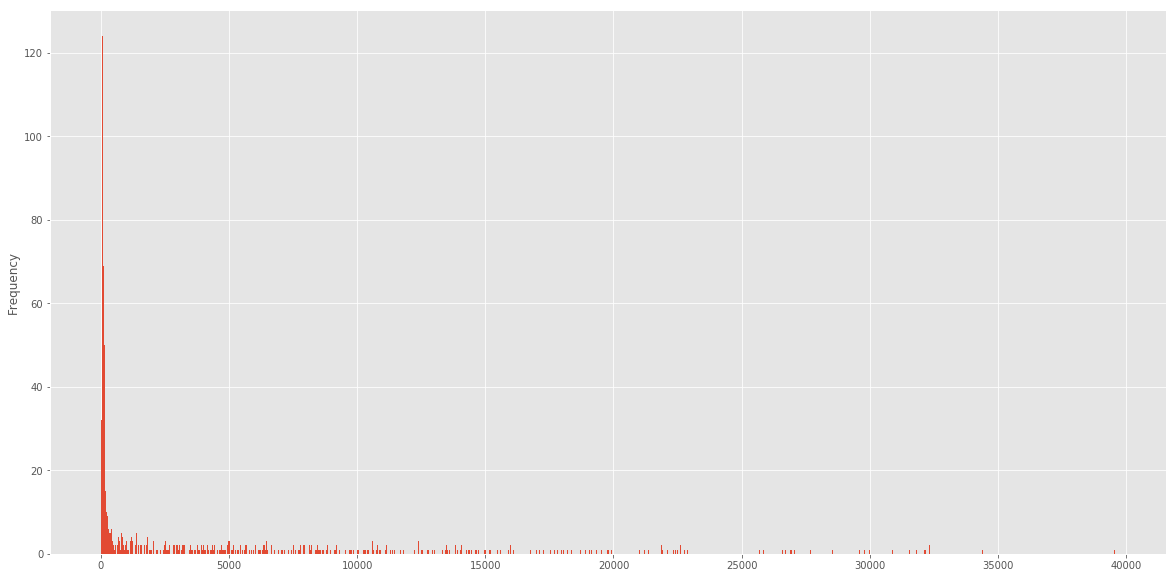

In [86]:
plt.figure(figsize=(20,10))

southbound['time_south'].astype('timedelta64[s]').plot.hist(bins=1000)

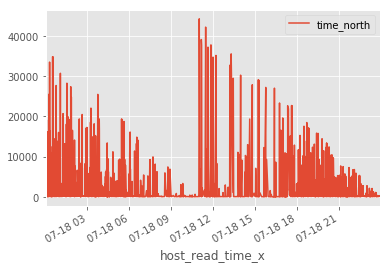

In [87]:
plt.figure(figsize=(20,10))
northbound = northbound.assign(time_north=northbound['time_north'].astype('timedelta64[s]'))
northbound.plot(x='host_read_time_x', y='time_north')

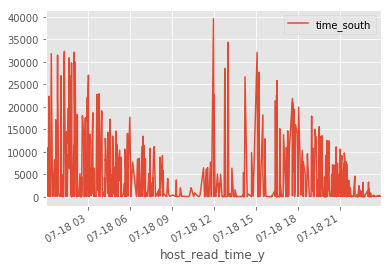

In [88]:
plt.figure(figsize=(20,10))
southbound = southbound.assign(time_south = southbound['time_south'].astype('timedelta64[s]'))
southbound.plot(x='host_read_time_y', y='time_south')

KeyError: 'host_read_time_x'

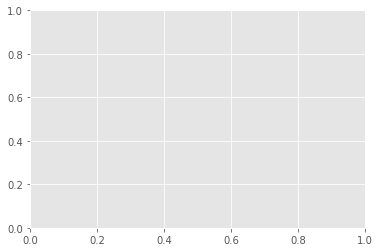

In [97]:
southbound.plot(kind='scatter', x='host_read_time_x', y='time_south')

In [54]:
def date_range(start, end, intv):
    diff = (end  - start ) / intv
    for i in range(intv):
        yield (start + diff * i)
    yield end

In [56]:
northbound = northbound.sort_values(by='host_read_time_x')
x_list = northbound['host_read_time_x'].tolist()
date_range(x_list[0], x_list[-1], timedelta.min * 10)

OverflowError: normalized days too large to fit in a C int

In [69]:
x_list[0]

Timestamp('2016-07-18 00:00:38')

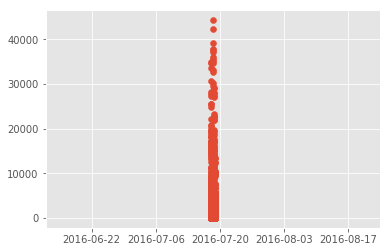

In [49]:
plt.scatter(northbound['host_read_time_x'].tolist(), northbound['time_north'].tolist())

In [50]:
northbound['host_read_time_x'].tolist()

[Timestamp('2016-07-18 00:00:38'),
 Timestamp('2016-07-18 00:00:46'),
 Timestamp('2016-07-18 00:00:47'),
 Timestamp('2016-07-18 00:00:52'),
 Timestamp('2016-07-18 00:01:23'),
 Timestamp('2016-07-18 00:02:13'),
 Timestamp('2016-07-18 00:02:40'),
 Timestamp('2016-07-18 00:03:54'),
 Timestamp('2016-07-18 00:06:36'),
 Timestamp('2016-07-18 00:06:49'),
 Timestamp('2016-07-18 00:07:38'),
 Timestamp('2016-07-18 00:07:41'),
 Timestamp('2016-07-18 00:07:50'),
 Timestamp('2016-07-18 00:07:52'),
 Timestamp('2016-07-18 00:08:30'),
 Timestamp('2016-07-18 00:08:43'),
 Timestamp('2016-07-18 00:09:42'),
 Timestamp('2016-07-18 00:10:18'),
 Timestamp('2016-07-18 00:10:37'),
 Timestamp('2016-07-18 00:11:05'),
 Timestamp('2016-07-18 00:11:19'),
 Timestamp('2016-07-18 00:11:26'),
 Timestamp('2016-07-18 00:11:58'),
 Timestamp('2016-07-18 00:13:44'),
 Timestamp('2016-07-18 00:13:51'),
 Timestamp('2016-07-18 00:15:19'),
 Timestamp('2016-07-18 00:15:40'),
 Timestamp('2016-07-18 00:15:57'),
 Timestamp('2016-07-